# Credit Card Fraud Detection

This dataset contains transactions made by European cardholders in September 2013. The provided 28 features correspond to the projection of the original data onto its principal component space, excepting the "time" and "amount" features (the original data cannot be provided for privacy reasons). This dataset is very imbalanced with fradulent transactions composing 0.172% of all transactions. This dataset was created through a collaboration between Worldline and the machine learning group of ULB (Université Libre de Bruxelles). More information about this dataset can be found <a href="https://www.kaggle.com/mlg-ulb/creditcardfraud">here</a>. This largely follows the tutorial <a href="https://www.tensorflow.org/tutorials/structured_data/imbalanced_data">here</a>.

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from os import getcwd
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sys
import tensorflow as tf

path = Path(getcwd())
p = str(path.parent.parent.parent.absolute())
if p not in sys.path:
    sys.path.append(p)

import custom_helper_functions as helper_functions

plt.style.use('dark_background')

helper_functions.show_all_jupyter_output()

## Loading and Processing the Dataset

In [2]:
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head()
raw_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [3]:
cleaned_df = raw_df.copy()
_ = cleaned_df.pop('Time')

eps = 0.001
cleaned_df['Log Amount'] = np.log(cleaned_df.pop('Amount')+eps)

train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

test_labels = np.array(test_df.pop('Class'))
train_labels = np.array(train_df.pop('Class'))
val_labels = np.array(val_df.pop('Class'))

test_features = np.array(test_df)
train_features = np.array(train_df)
val_features = np.array(val_df)

scalar = StandardScaler()
train_features = scalar.fit_transform(train_features)

test_features = scalar.transform(test_features)
val_features = scalar.transform(val_features)

test_features = np.clip(test_features, -5, 5)
train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5  )

## Defining the Model and Metrics

In [4]:
METRICS = [
    tf.keras.metrics.TruePositives(name='tp'),
    tf.keras.metrics.FalsePositives(name='fp'),
    tf.keras.metrics.TrueNegatives(name='tn'),
    tf.keras.metrics.FalseNegatives(name='fn'),
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc'),
    tf.keras.metrics.AUC(name='prc', curve='PR')
]

def make_model(metrics=METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='relu', input_shape=(train_features.shape[-1],)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias)
    ])
    model.compile(
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=metrics,
        optimizer=tf.keras.optimizers.Adam()
    )
    return model

## Training the Model

In [5]:
batch_size = 2048
epochs = 100

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    mode='max',
    monitor='val_prc',
    patience=10,
    restore_best_weights=True,
    verbose=1,
)

neg, pos = np.bincount(raw_df['Class'])
initial_bias = np.log([pos/neg])
model = make_model(output_bias=initial_bias)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=batch_size,
    callbacks=[early_stopping_callback],
    epochs=epochs,
    validation_data=(val_features, val_labels)
)

Epoch 1/100
90/90 [==============================] - 4s 16ms/step - loss: 0.0154 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 181946.0000 - fn: 330.0000 - accuracy: 0.9982 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5520 - prc: 0.0058 - val_loss: 0.0102 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 45498.0000 - val_fn: 71.0000 - val_accuracy: 0.9984 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6544 - val_prc: 0.1057
Epoch 2/100
90/90 [==============================] - 1s 7ms/step - loss: 0.0101 - tp: 25.0000 - fp: 9.0000 - tn: 181937.0000 - fn: 305.0000 - accuracy: 0.9983 - precision: 0.7353 - recall: 0.0758 - auc: 0.7506 - prc: 0.2361 - val_loss: 0.0069 - val_tp: 3.0000 - val_fp: 0.0000e+00 - val_tn: 45498.0000 - val_fn: 68.0000 - val_accuracy: 0.9985 - val_precision: 1.0000 - val_recall: 0.0423 - val_auc: 0.8589 - val_prc: 0.5646
Epoch 3/100
90/90 [==============================] - 1s 7ms/step - loss: 0.0072 - tp: 105.0000 - fp: 14.0000 - tn: 181932.00

## Plotting Training Metrics

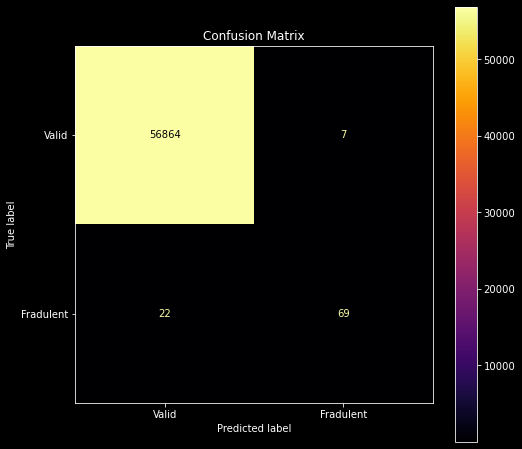

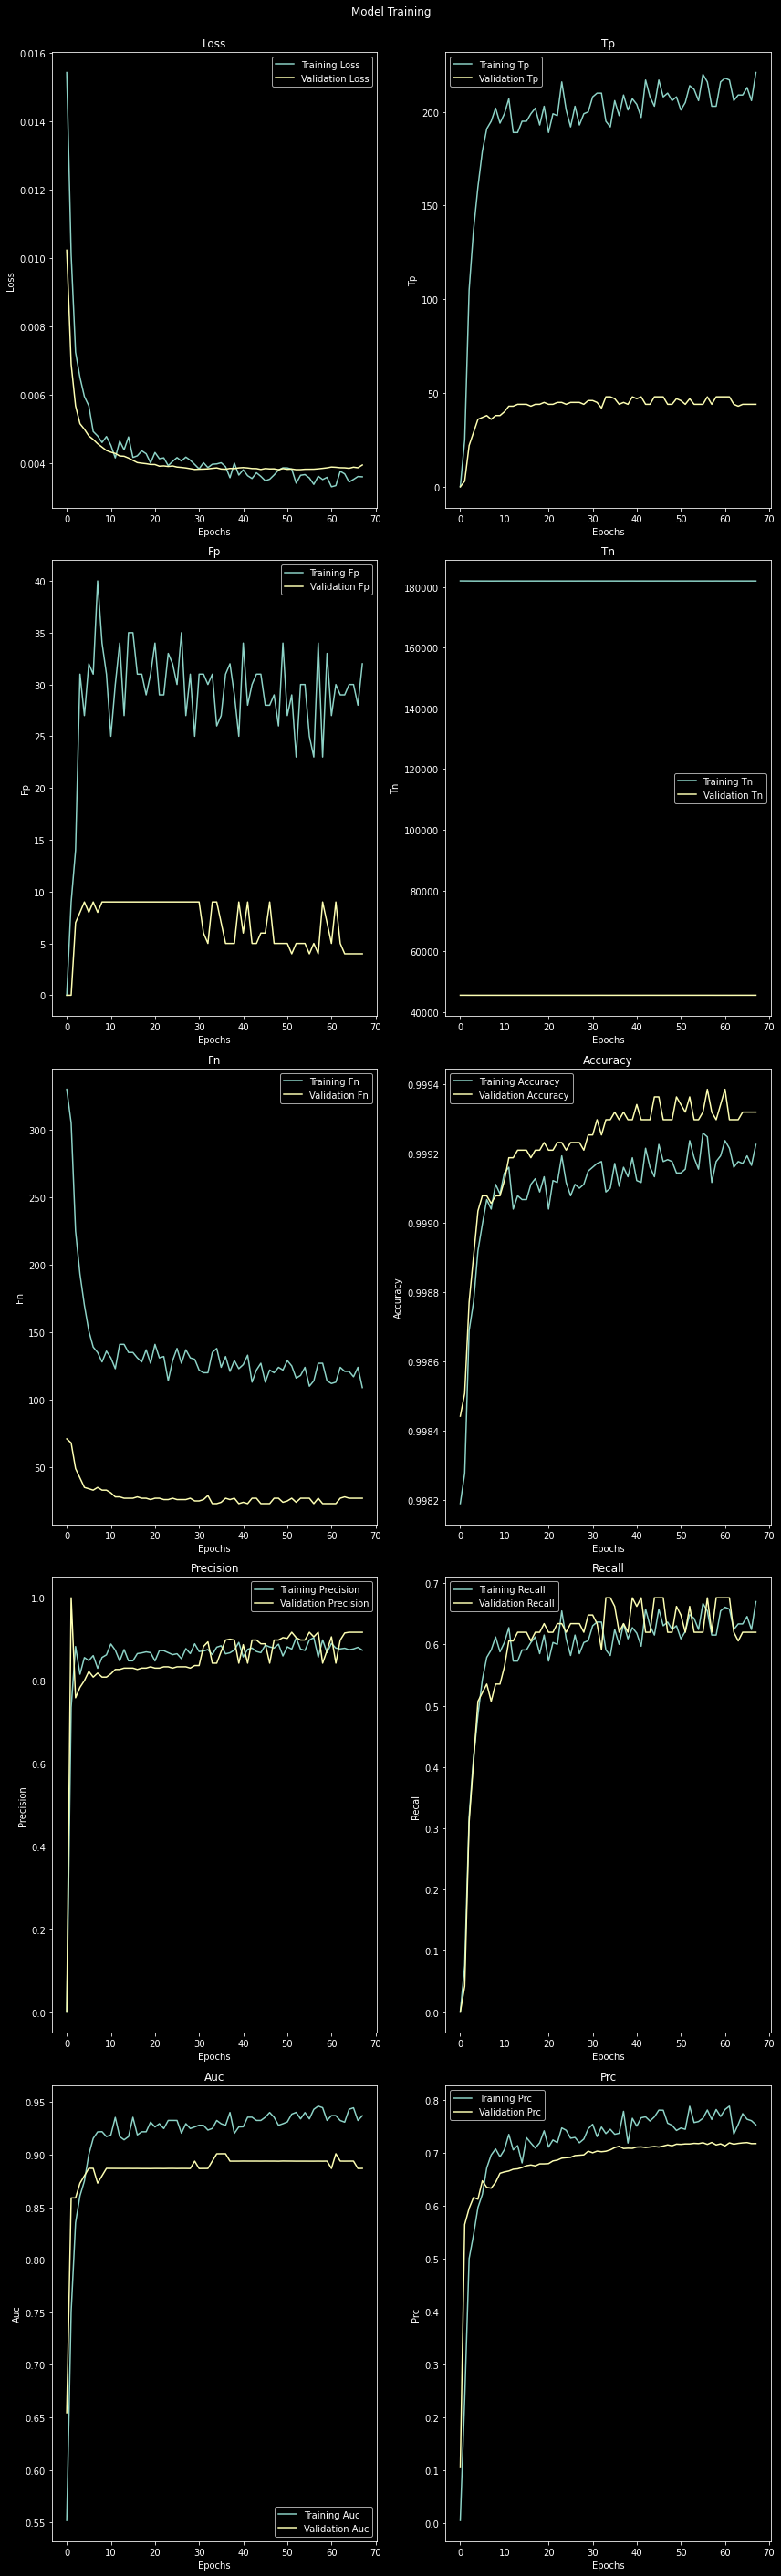

In [6]:
predictions = model.predict(test_features)
predictions = (predictions > 0.5).astype(np.int32)
predictions = predictions.reshape((len(predictions)))
helper_functions.plot_confusion_matrix(predictions, test_labels, class_names=['Valid', 'Fradulent'])
helper_functions.plot_training_metrics(baseline_history)

## Compensating for the Class Imbalance Through Class Weights

Epoch 1/100
90/90 [==============================] - 3s 16ms/step - loss: 1.5963e-05 - tp: 89.0000 - fp: 1107.0000 - tn: 226352.0000 - fn: 297.0000 - accuracy: 0.9938 - precision: 0.0744 - recall: 0.2306 - auc: 0.6716 - prc: 0.1547 - val_loss: 0.0102 - val_tp: 22.0000 - val_fp: 15.0000 - val_tn: 45475.0000 - val_fn: 57.0000 - val_accuracy: 0.9984 - val_precision: 0.5946 - val_recall: 0.2785 - val_auc: 0.8862 - val_prc: 0.3296
Epoch 2/100
90/90 [==============================] - 1s 8ms/step - loss: 8.0153e-06 - tp: 137.0000 - fp: 618.0000 - tn: 181351.0000 - fn: 170.0000 - accuracy: 0.9957 - precision: 0.1815 - recall: 0.4463 - auc: 0.8445 - prc: 0.2370 - val_loss: 0.0130 - val_tp: 55.0000 - val_fp: 41.0000 - val_tn: 45449.0000 - val_fn: 24.0000 - val_accuracy: 0.9986 - val_precision: 0.5729 - val_recall: 0.6962 - val_auc: 0.9068 - val_prc: 0.5850
Epoch 3/100
90/90 [==============================] - 1s 8ms/step - loss: 5.1265e-06 - tp: 196.0000 - fp: 1140.0000 - tn: 180829.0000 - fn: 11

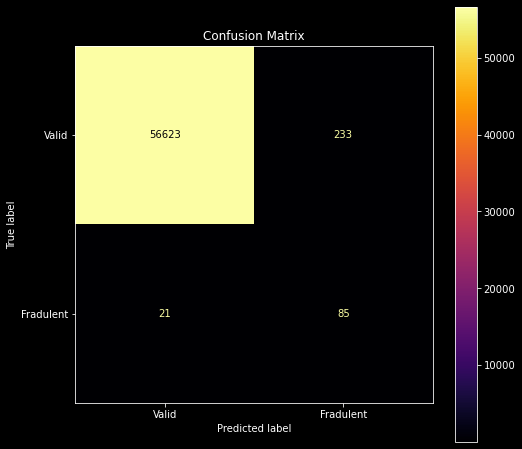

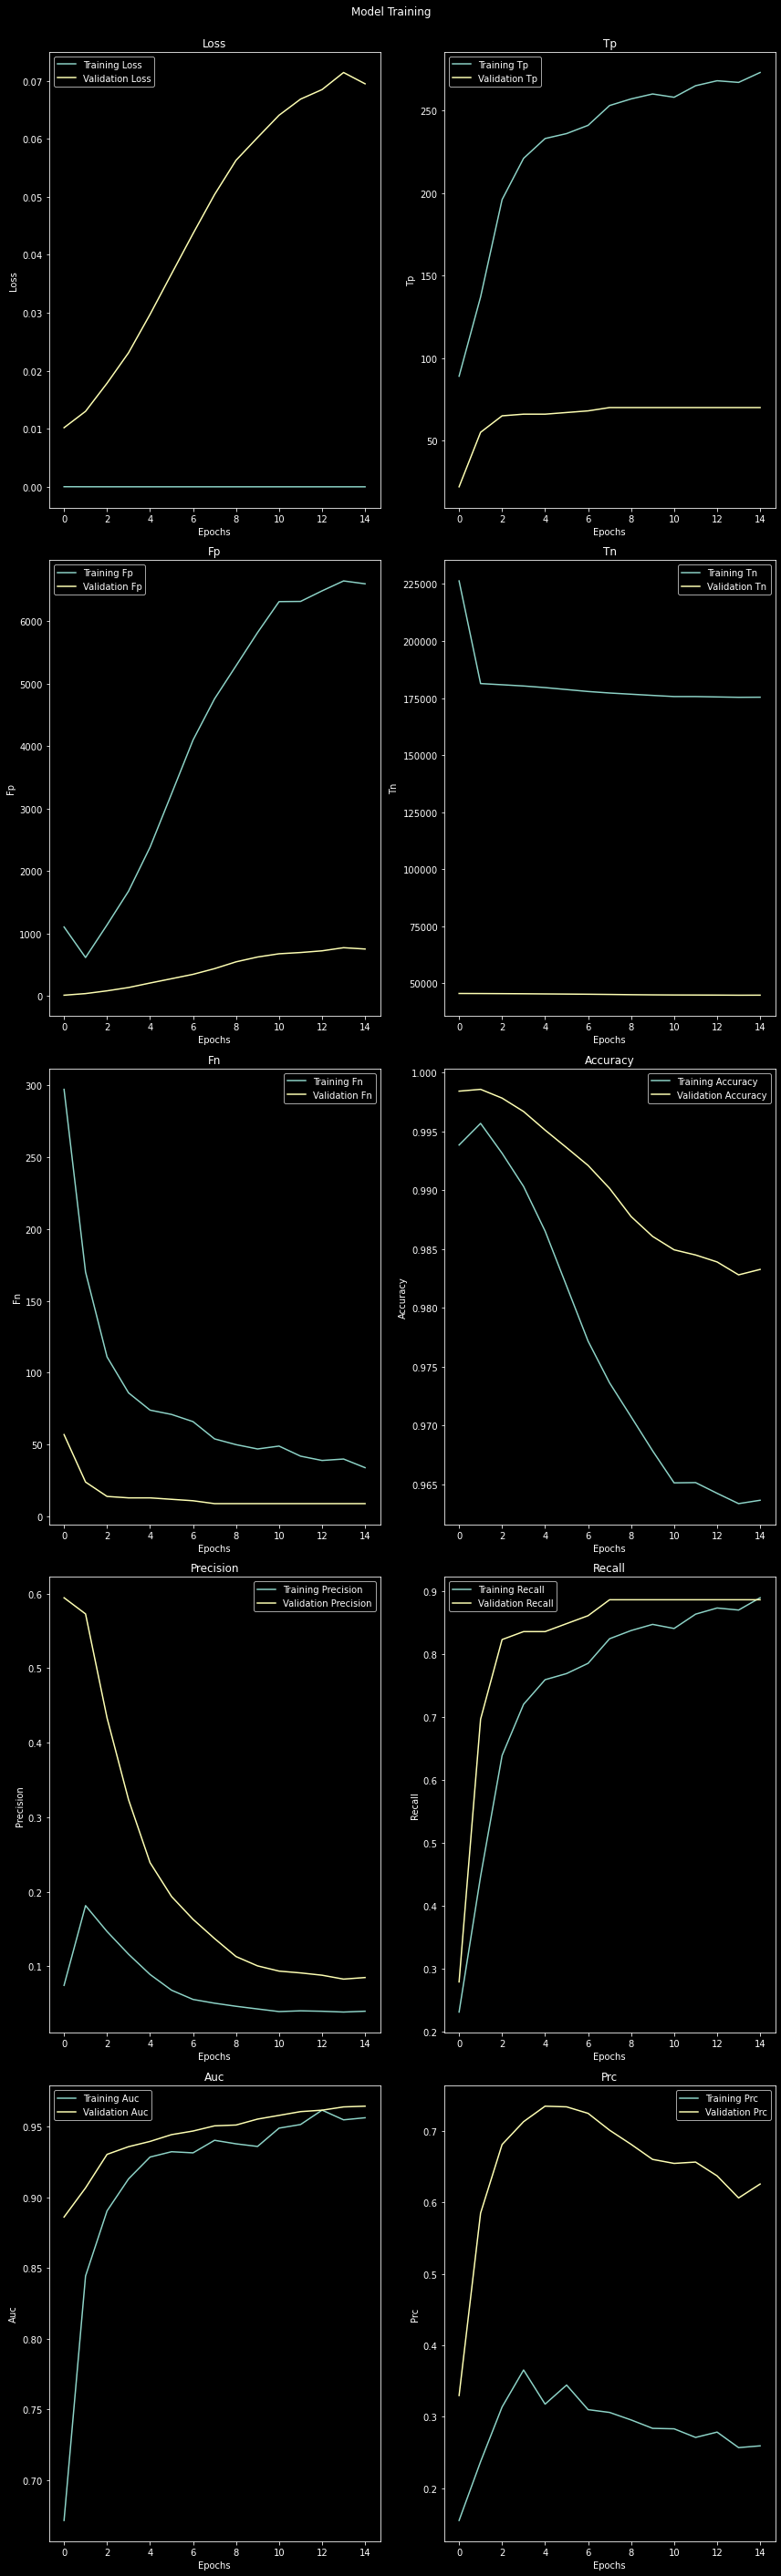

In [9]:
neg, pos = np.bincount(raw_df['Class'])
weight_for_0 = 1/neg
weight_for_1 = 1/pos
class_weights = {0: weight_for_0, 1: weight_for_1}

batch_size = 2048
epochs=100

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    mode='max',
    monitor='val_prc',
    patience=10,
    restore_best_weights=True,
    verbose=1,
)

initial_bias = np.log([pos/neg])
weighted_model = make_model(output_bias=initial_bias)
weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=batch_size,
    callbacks=[early_stopping_callback],
    class_weight=class_weights,
    epochs=epochs,
    validation_data=(val_features, val_labels)
)

predictions = weighted_model.predict(test_features)
predictions = (predictions > 0.5).astype(np.int32)
predictions = predictions.reshape((len(predictions)))
helper_functions.plot_confusion_matrix(predictions, test_labels, class_names=['Valid', 'Fradulent'])
helper_functions.plot_training_metrics(weighted_history)

## Compensating for the Class Imbalance Through Sampling

In [10]:
# Using NumPy

pos_features = train_features[train_labels==1]
neg_features = train_features[train_labels==0]

pos_labels = train_labels[train_labels==1]
neg_labels = train_labels[train_labels==0]

pos_ids = np.arange(len(pos_features))
choices = np.random.choice(pos_ids, len(neg_features))

resampled_pos_features = pos_features[choices]
resampled_pos_labels = pos_labels[choices]

resampled_features = np.concatenate([resampled_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([resampled_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

# Using tf.data Datasets

shuffle_buffer = 10000

def make_ds(features, labels):
    ds = tf.data.Dataset.from_tensor_slices((features, labels))
    ds = ds.shuffle(shuffle_buffer).repeat()
    return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels))
val_ds = val_ds.cache()
val_ds = val_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [13]:
resampled_model = make_model(output_bias=0)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    mode='max',
    monitor='val_prc',
    patience=10,
    restore_best_weights=True,
    verbose=1,
)

resampled_history = resampled_model.fit(
    resampled_ds,
    callbacks=[early_stopping_callback],
    epochs=10*epochs,
    steps_per_epoch=20,
    validation_data=val_ds
)

Epoch 1/1000
20/20 [==============================] - 3s 77ms/step - loss: 1.9909 - tp: 9280.0000 - fp: 14336.0000 - tn: 51595.0000 - fn: 11318.0000 - accuracy: 0.7035 - precision: 0.3930 - recall: 0.4505 - auc: 0.7152 - prc: 0.4933 - val_loss: 1.1138 - val_tp: 38.0000 - val_fp: 33423.0000 - val_tn: 12067.0000 - val_fn: 41.0000 - val_accuracy: 0.2656 - val_precision: 0.0011 - val_recall: 0.4810 - val_auc: 0.3532 - val_prc: 0.0019
Epoch 2/1000
20/20 [==============================] - 0s 21ms/step - loss: 1.1377 - tp: 13716.0000 - fp: 13830.0000 - tn: 6796.0000 - fn: 6618.0000 - accuracy: 0.5008 - precision: 0.4979 - recall: 0.6745 - auc: 0.6099 - prc: 0.7160 - val_loss: 1.0608 - val_tp: 75.0000 - val_fp: 32397.0000 - val_tn: 13093.0000 - val_fn: 4.0000 - val_accuracy: 0.2890 - val_precision: 0.0023 - val_recall: 0.9494 - val_auc: 0.8603 - val_prc: 0.0658
Epoch 3/1000
20/20 [==============================] - 0s 20ms/step - loss: 0.7976 - tp: 16702.0000 - fp: 12980.0000 - tn: 7508.0000 - 

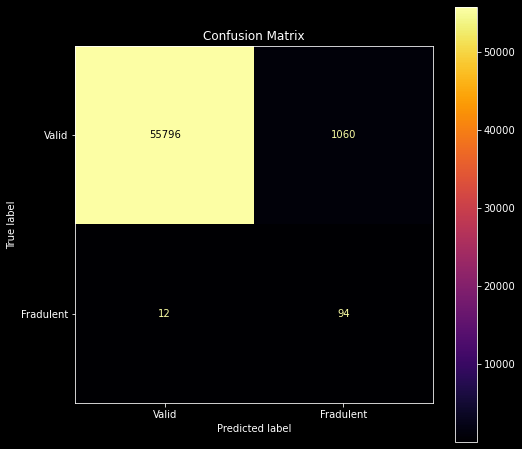

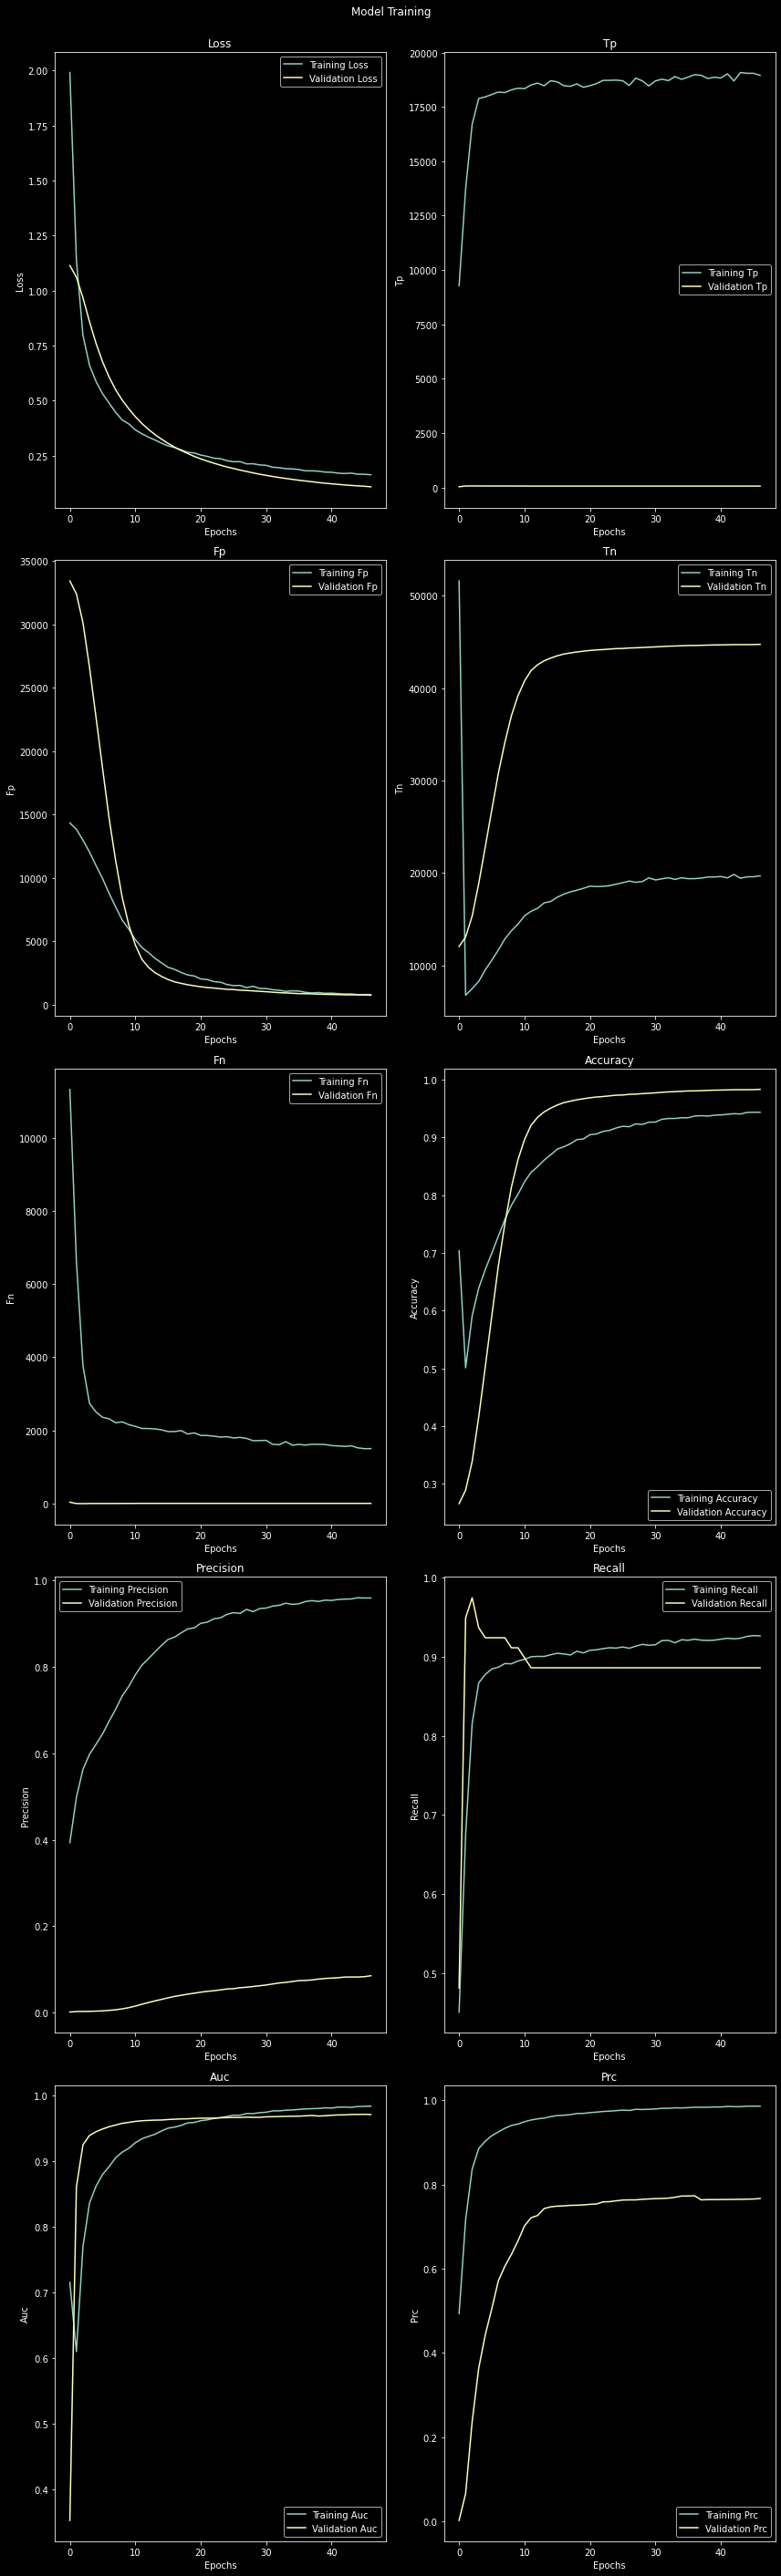

In [14]:
predictions = resampled_model.predict(test_features)
predictions = (predictions > 0.5).astype(np.int32)
predictions = predictions.reshape((len(predictions)))
helper_functions.plot_confusion_matrix(predictions, test_labels, class_names=['Valid', 'Fradulent'])
helper_functions.plot_training_metrics(resampled_history)